In [1]:
# Add Magic Command
%matplotlib inline

# Add dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading data from csv files and stores it in a DataFrame
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [3]:
# Checks for the total number of rows, which includes a header row
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [4]:
# Checks to see if any of the rows have empty values in them
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# Checks data types to see what column we can merge the dataframe with another dataframe with
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Pulls all unique values from a specific column
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Gets the total number of cities based on their type
sum(city_data_df["type"]=="Rural")

18

In [8]:
# Checks for the total number of rows, which includes a header row
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
# Checks to see if any of the rows have empty values in them
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
# Checks data types to see what column we can merge the dataframe with another dataframe with
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
# Merging the two DataFrames into one workable 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left',  on=['city','city'])

In [16]:
# Creates DataFrames of all citys based on their type
urban_cities_df = pyber_data_df[pyber_data_df['type'] == "Urban"]
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [15]:
# Creates a series of the number of rides in each city based on their type
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

In [22]:
# Creates a series of the average fare for each city based on its type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

In [23]:
# Creates a series of the average driver count for each city based on its type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

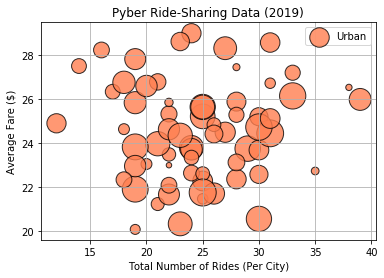

In [29]:
# Creating Bubble chart using MatPlotLib method for Urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count, c='coral', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, label='Urban')
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

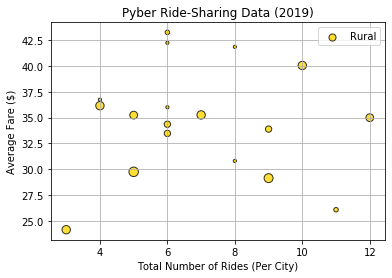

In [34]:
# Creates Bubble Chart for Rural Cities
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, 
            c='gold', edgecolor='black', 
            linewidths=1, alpha=0.8, 
            label='Rural')
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

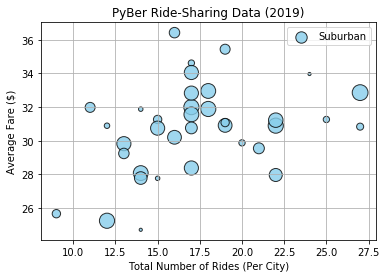

In [33]:
# Creates Bubble Chart for Suburban Cities
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue', 
            edgecolor='black', linewidth=1, 
            alpha=0.8, label='Suburban')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

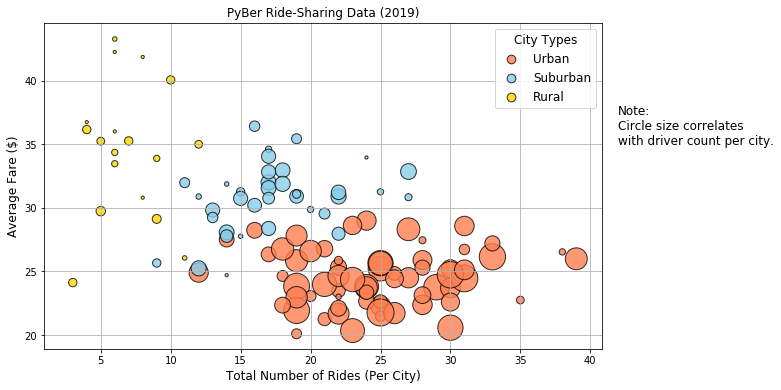

In [41]:
# Shows all three cities in one Bubble Chart
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            c='coral',
            edgecolor='black', linewidths=1,
            alpha=0.8, label='Urban')
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue', 
            edgecolor='black', linewidth=1, 
            alpha=0.8, label='Suburban')
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, 
            c='gold', edgecolor='black', 
            linewidths=1, alpha=0.8, 
            label='Rural')
# Styles Chart
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Notes
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")
plt.savefig("analysis/Fig1.png")
plt.show()